# Práctico final de curso "Astroestadística"

    El catálogo que se usará en el presente trabajo es el "All Sky Automated Survey for SuperNovae" (ASAS-SN), primer survey óptico capaz de monitorear el cielo en su totalidad desde la Tierra, alcanzando un límite de magnitud V=18. 
    Si bien el proyecto se enfoca principalmente en detectar supernovas brillantes, también ha descubierto una gran cantidad de estrellas variables de diversos tipos (Cefeidas, RR Lyrae, Rotacionales, entre otras). 
    Para este trabajo se utilizarán las binarias eclipsantes provenientes de dicho catálogo con el objetivo de clasificarlas en detached (EA), semi-detached (EB) y binarias de contacto (EW).
    La muestra a analizar consta de 84530 objetos. Además se empleará una muestra de entrenamiento de 70000 binarias eclipsantes provenientes del mismo catálogo.

# Análisis exploratorio de datos

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [2]:
tabla = pd.read_csv('train.csv')
muestra=pd.DataFrame(tabla)

Las muestras cuenta con 36 variables, cuyos nombres se detallan a continuación.

In [3]:
muestra.columns

Index(['raj2000', 'dej2000', 'l', 'b', 'mean_vmag', 'amplitude', 'period',
       'variable_type', 'class_probability', 'phot_g_mean_mag',
       'e_phot_g_mean_mag', 'phot_bp_mean_mag', 'e_phot_bp_mean_mag',
       'phot_rp_mean_mag', 'e_phot_rp_mean_mag', 'bp_rp', 'parallax',
       'parallax_error', 'vt', 'dist', 'j_mag', 'e_j_mag', 'h_mag', 'e_h_mag',
       'k_mag', 'e_k_mag', 'w1_mag', 'e_w1_mag', 'w2_mag', 'e_w2_mag',
       'w3_mag', 'e_w3_mag', 'w4_mag', 'e_w4_mag', 'w1_w2', 'w3_w4'],
      dtype='object')

Se eliminan todos los posibles valores NaN que existan en ambas tablas. Durante este paso se ignoran las columnas de error 'e_w3_mag' y 'e_w4_mag', dado que poseen muchos valores NaN, luego se decidirá cómo proseguir con ellas.

In [4]:
muestra = muestra.dropna(subset=['raj2000', 'dej2000', 'l', 'b', 'mean_vmag', 'amplitude', 'period',
       'variable_type', 'class_probability', 'phot_g_mean_mag',
       'e_phot_g_mean_mag', 'phot_bp_mean_mag', 'e_phot_bp_mean_mag',
       'phot_rp_mean_mag', 'e_phot_rp_mean_mag', 'bp_rp', 'parallax',
       'parallax_error', 'vt', 'dist', 'j_mag', 'e_j_mag', 'h_mag', 'e_h_mag',
       'k_mag', 'e_k_mag', 'w1_mag', 'e_w1_mag', 'w2_mag', 'e_w2_mag',
       'w3_mag','w4_mag', 'w1_w2', 'w3_w4'])

In [5]:
muestra.shape

(65260, 36)

Una vez eliminados tales objetos de la muestra, nos quedamos con un conjunto de 65260 objetos en la muestra de entrenamiento. El siguiente paso será representar las istribuciones de las distintas variables, con el objetivo de visualizar la posible existencia de valores atípicos.

In [6]:
muestra2=muestra[['raj2000', 'dej2000', 'l', 'b', 'mean_vmag', 'amplitude', 'period','phot_g_mean_mag',
                  'e_phot_g_mean_mag', 'phot_bp_mean_mag', 'e_phot_bp_mean_mag',
                   'phot_rp_mean_mag', 'e_phot_rp_mean_mag', 'bp_rp', 'parallax',
                   'parallax_error', 'vt', 'dist', 'j_mag', 'e_j_mag', 'h_mag', 'e_h_mag',
                   'k_mag', 'e_k_mag', 'w1_mag', 'e_w1_mag', 'w2_mag', 'e_w2_mag',
                   'w3_mag', 'w4_mag', 'w1_w2', 'w3_w4']]

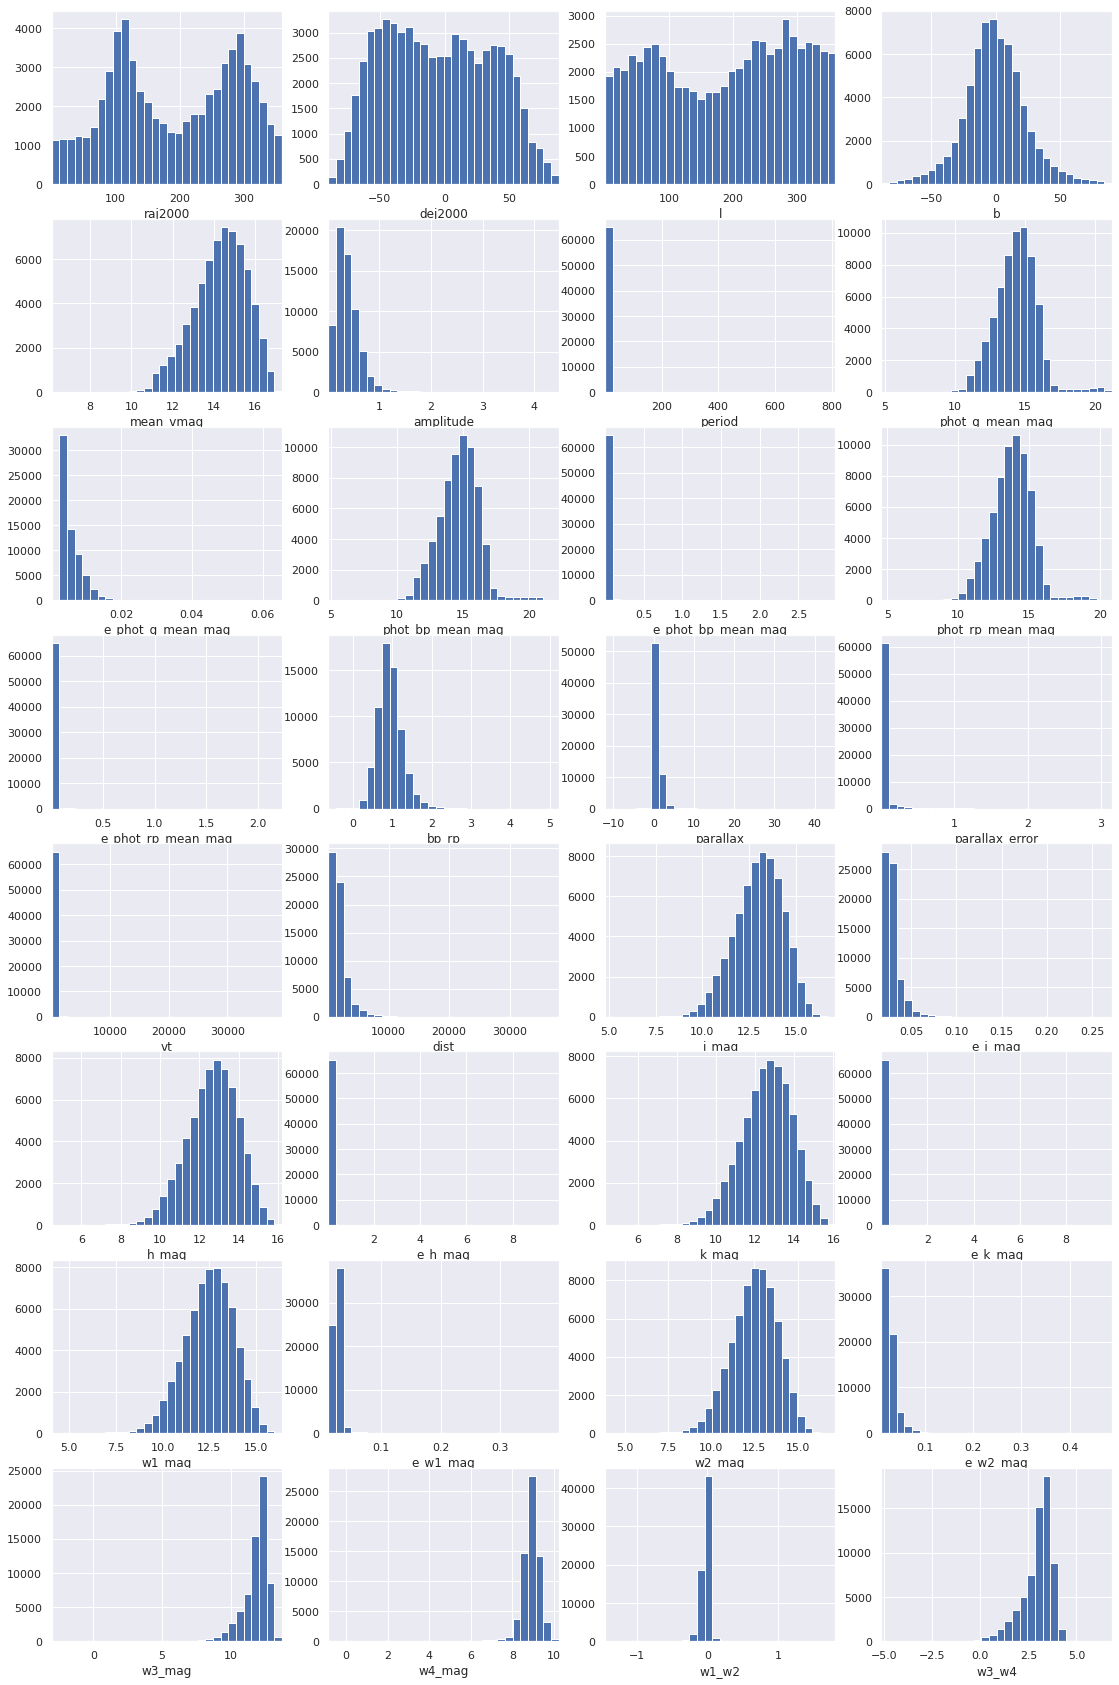

In [7]:
name=muestra2.columns
fig=plt.figure(figsize=(19,30))
fig.tight_layout()
for i in range (muestra2.shape[1]):
    x=muestra2[name[i]]
    ax=plt.subplot(8,4,i+1)
    ax.hist(x,bins=30)
    ax.set(xlabel=name[i])
    ax.set_xlim(min(x),max(x))

Se puede observar que para algunas variables existen ciertos valores que se pueden considerar outliers. Por ello se procederá a eliminar los objetos que posean dichos valores atípicos.

In [8]:
muestra3=muestra[['amplitude','period','e_phot_g_mean_mag','e_phot_bp_mean_mag',
       'e_phot_rp_mean_mag', 'parallax',
       'parallax_error', 'vt', 'dist','e_j_mag','e_h_mag',
       'e_k_mag', 'e_w1_mag', 'e_w2_mag',
       'w3_mag', 'w4_mag','w1_w2']]

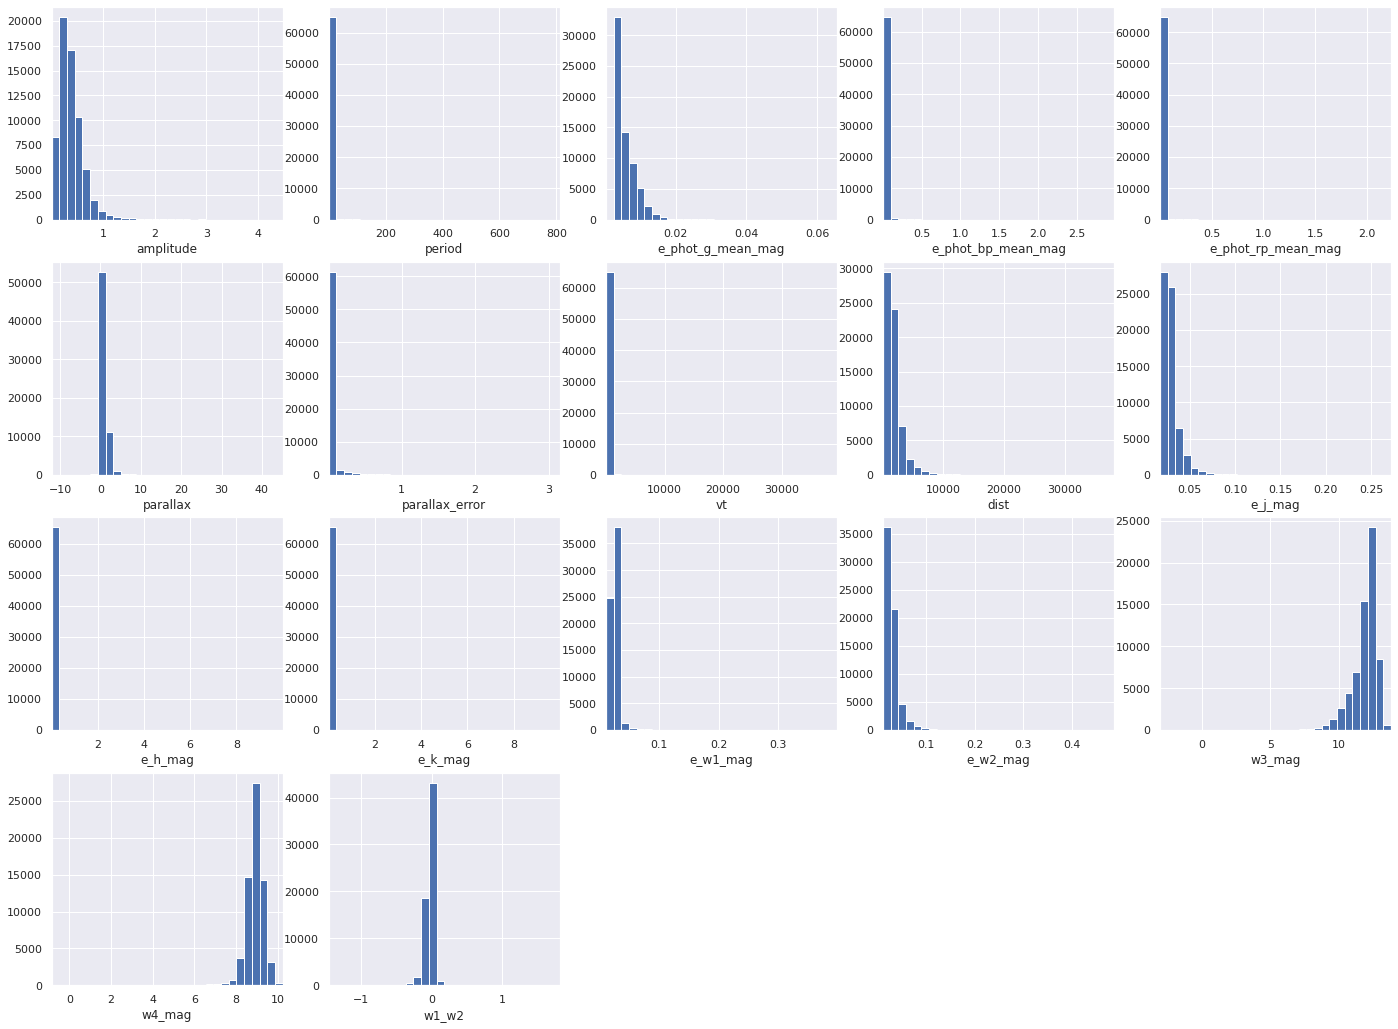

In [9]:
outliers=muestra3.columns
fig=plt.figure(figsize=(24,18))
fig.tight_layout()
for i in range (muestra3.shape[1]):
    x=muestra3[outliers[i]]
    ax=plt.subplot(4,5,i+1)
    ax.hist(x, bins=30)
    ax.set(xlabel=outliers[i])
    ax.set_xlim(min(x),max(x))

Elimino los valores atípicos de la muestra considerando solo los valores que se encuentren entre los percentiles 10 y 90:

In [10]:
for i in range (muestra3.shape[1]):
    q1= np.quantile(muestra[outliers[i]], 0.10)
    q3= np.quantile(muestra[outliers[i]], 0.90)
    minn=q1-1.5*(q3-q1)
    maxx=q3+1.5*(q3-q1)
    muestra=muestra[(muestra[outliers[i]] > minn)&(muestra[outliers[i]] < maxx)]

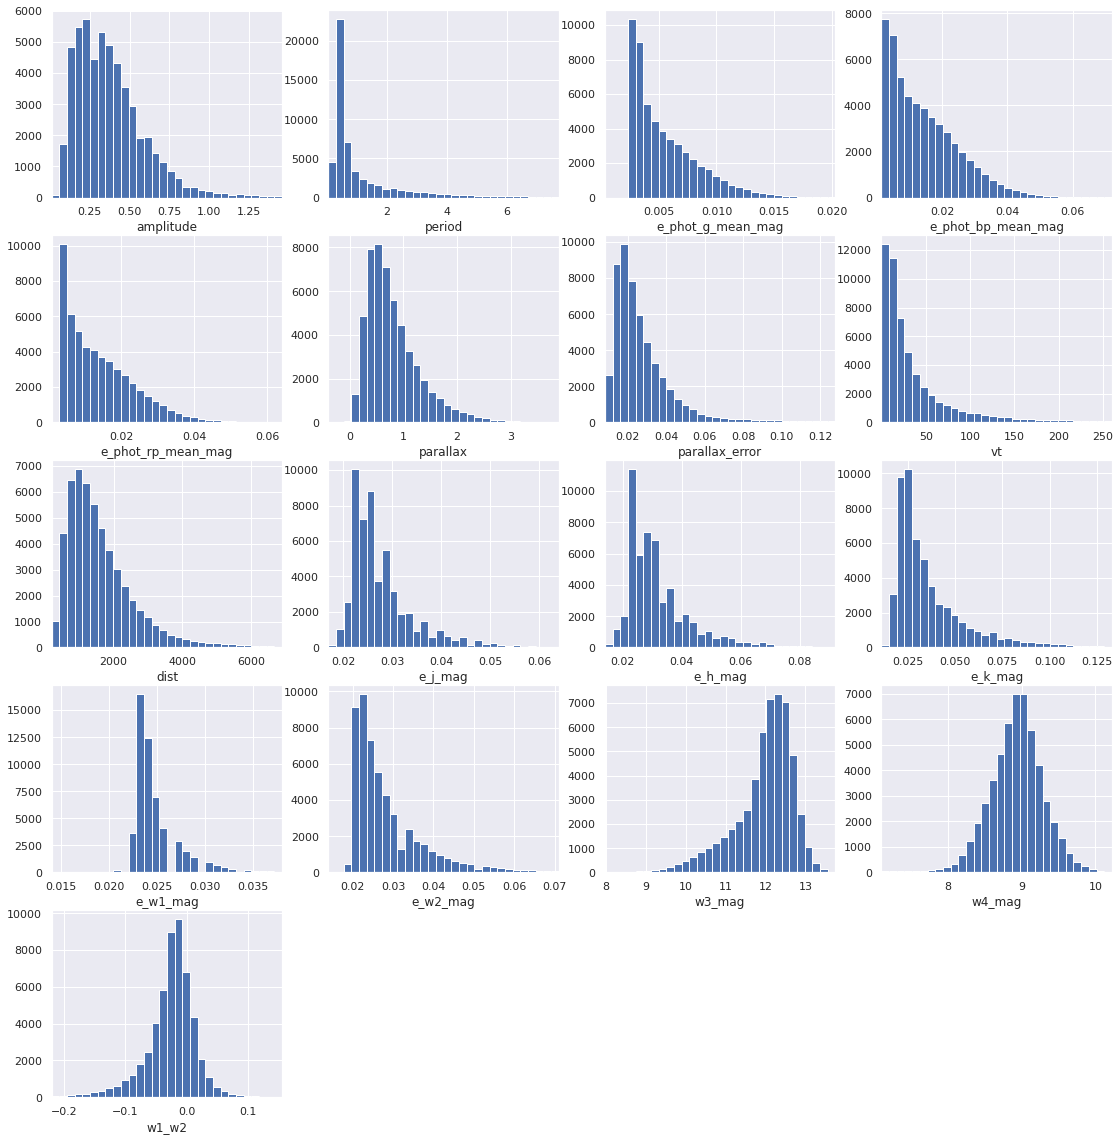

In [11]:
outliers=muestra3.columns
fig=plt.figure(figsize=(19,20))
fig.tight_layout()
for i in range (muestra3.shape[1]):
    x=muestra[outliers[i]]
    ax=plt.subplot(5,4,i+1)
    ax.hist(x, bins=30)
    ax.set(xlabel=outliers[i])
    ax.set_xlim(min(x),max(x))

Aún se observan valores atípicos en la variable 'period', por lo que haré un nuevo corte según esta variable, teniendo en cuenta solo los valores que se encuentren entre los percentiles 20 y 80:

Text(0.5, 0, 'Period')

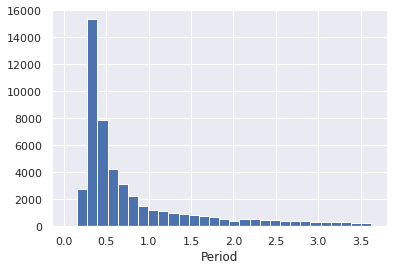

In [12]:
q1= np.quantile(muestra['period'], 0.20)
q3= np.quantile(muestra['period'], 0.80)
minn=q1-1.5*(q3-q1)
maxx=q3+1.5*(q3-q1)
muestra=muestra[(muestra['period'] > minn)&(muestra['period'] < maxx)]
plt.hist(muestra['period'],bins=30)
plt.xlabel('Period')

A continuación se muestran dos histogramas de amplitud y período, diferenciando los distintos tipos de binarias eclipsantes existentes en la muestra:

Text(0.5, 1.0, 'PERÍODO')

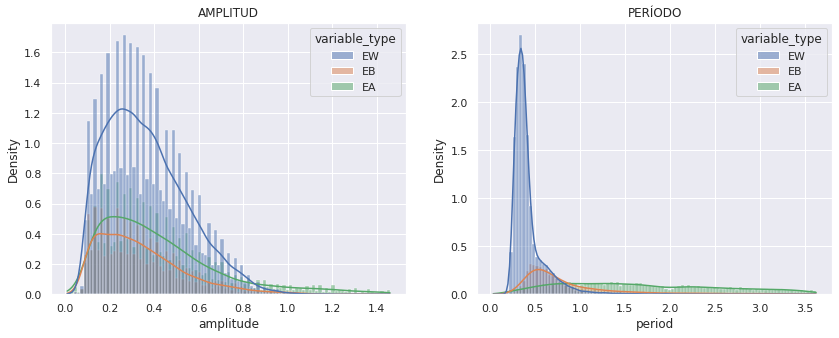

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(14,5))

# Amplitud
sns.histplot(ax=axes[0],data=muestra, x="amplitude", hue="variable_type",kde=True,stat='density',common_norm=True)
#sns.histplot(ax=axes[0], x=bulbasaur.index, y=bulbasaur.values)
axes[0].set_title('AMPLITUD')

# Período
sns.histplot(ax=axes[1],data=muestra, x="period", hue="variable_type",kde=True,stat='density',common_norm=True)
#sns.histplot(ax=axes[0], x=bulbasaur.index, y=bulbasaur.values)
axes[1].set_title('PERÍODO')



# Análisis PCA

Una vez conforme con los resultados, procedo a realizar el análisis PCA a la muestra. Para ello, se comienza por la visualización de media y varianza de las variables contenidas.

In [14]:
muestra2=muestra[['raj2000', 'dej2000', 'l', 'b', 'mean_vmag', 'amplitude', 'period','phot_g_mean_mag',
                  'e_phot_g_mean_mag', 'phot_bp_mean_mag', 'e_phot_bp_mean_mag',
                   'phot_rp_mean_mag', 'e_phot_rp_mean_mag', 'bp_rp', 'parallax',
                   'parallax_error', 'vt', 'dist', 'j_mag', 'e_j_mag', 'h_mag', 'e_h_mag',
                   'k_mag', 'e_k_mag', 'w1_mag', 'e_w1_mag', 'w2_mag', 'e_w2_mag',
                   'w3_mag', 'w4_mag', 'w1_w2', 'w3_w4']]

media=muestra2.mean(axis=0)
varianza=muestra2.var(axis=0)

df = pd.DataFrame()
df['Media']=media
df['Varianza']=varianza

df

,Media,Varianza
raj2000,189.904136,9684.453199
dej2000,-4.031672,1675.826380
l,185.986063,10958.716258
b,-0.846465,571.590559
mean_vmag,14.370167,1.469686
amplitude,0.375782,0.045081
period,0.844763,0.590760
phot_g_mean_mag,14.321969,1.531761
e_phot_g_mean_mag,0.005659,0.000008
phot_bp_mean_mag,14.684893,1.640872


  Es necesario estandarizar las variables dado que algunas tienen valores muy elevados (dist, vt) respecto al resto y podrían dominar las componentes principales al hacer el análisis PCA:

In [15]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

In [16]:
#Genero un pipeline que normalice los datos y le aplique el modelo PCA:

pipeline = make_pipeline(StandardScaler(), PCA())
pipeline.fit(muestra2)
pca = pipeline.named_steps['pca']  #extraigo modelo PCA

#Armo Dataframe con componentes principales para todos los objetos de la muestra

pca_data = pipeline.transform(muestra2)

Calculo el porcentaje de varianza acumulada explicada por las componentes principales para saber con cuántas me quedaré:

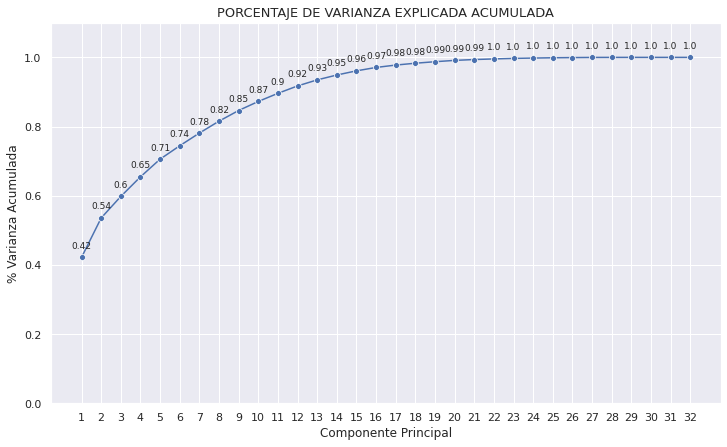

In [17]:
prop_varianza_acum = pca.explained_variance_ratio_.cumsum()
fig = plt.subplots(nrows=1, ncols=1, figsize=(12, 7))

ax = sns.lineplot(x=np.arange(len(muestra2.columns)) + 1, y=prop_varianza_acum, marker='o', data=pca, legend='brief')

for x, y in zip(np.arange(len(muestra2.columns))+1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(round(y, 2), (x,y), textcoords="offset points", xytext=(0,9), ha='center', fontsize=9)

ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(pca.n_components_)+1)
ax.set_title('PORCENTAJE DE VARIANZA EXPLICADA ACUMULADA', fontsize=13)
ax.set_xlabel('Componente Principal')
ax.set_ylabel('% Varianza Acumulada');

Del gráfico se puede observar que con 19 componentes principales se explica el 99% de los datos, por lo tanto reduzco la dimensionalidad de la siguiente manera:

In [18]:
pipeline = make_pipeline(StandardScaler(), PCA(n_components=19))
pipeline.fit(muestra2)
pca_data = pipeline.transform(muestra2)
pca_data=pd.DataFrame(pca_data)

In [19]:
pca_transf=pd.DataFrame(pipeline.fit_transform(pca_data))
pca_transf

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.810869,0.245377,-0.040766,-2.099287,-0.226035,2.301127,0.752645,0.645715,0.624427,-1.057931,-0.226765,1.218783,-1.826475,-0.222507,1.687242,0.803304,-0.793254,1.856127,0.428540
1,-0.130186,0.269426,0.823858,-0.058880,-1.501932,0.205026,0.221455,-0.244360,0.016960,-1.088744,-0.322173,-0.858535,0.200221,-0.190428,1.299766,1.221724,1.203389,-0.917127,1.510861
2,-0.555737,1.531260,-0.179005,-1.535645,-1.379639,-0.077818,0.531938,-0.158921,-0.963442,-0.480887,-1.195891,-0.658840,0.440429,-0.788020,0.837554,-1.086038,1.007153,-0.083715,0.467588
3,-1.123666,0.651172,0.969010,-0.193313,-0.476530,0.340417,1.055658,-0.391180,-1.009488,1.371027,-0.216470,-0.151099,0.535885,-1.896145,0.361835,0.271050,-0.268917,-0.509299,-0.376434
4,-1.662258,-1.219972,0.535231,0.049428,-0.061431,-1.109154,0.926324,-0.270287,-0.429460,0.244189,-0.266151,-0.374628,-0.598327,0.066295,-0.755622,-0.201382,-1.463618,-0.114243,0.158970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49689,0.929276,0.321034,-0.132101,0.309887,-1.020385,-1.072769,1.740115,-0.135852,1.152800,0.489902,-1.549529,-0.980612,-0.405144,-1.682918,-0.421521,0.122562,-1.494006,0.715877,0.199955
49690,-0.476285,0.581134,0.512855,-0.185124,0.528238,0.235901,-0.895832,-1.821744,2.715311,0.069634,0.534593,-1.491227,-0.861959,1.342569,0.313159,-0.549865,0.743755,0.778081,-0.405072
49691,-0.332341,0.593636,-0.184204,0.665940,-1.720889,2.149234,-0.643674,0.579663,-0.564147,0.047914,-0.525860,-0.236150,-0.150389,-0.318515,0.131728,-1.390128,0.564932,1.818188,0.077960
49692,0.245205,-2.010136,0.790203,-0.234997,1.818846,1.128524,-0.432861,-2.624249,-1.347584,-0.121426,1.960795,1.144929,-0.197316,2.971510,-2.071309,-0.176070,0.537114,-2.988210,0.226201


In [20]:
# Creo un dataframe con la contribución de cada variable a cada una de las 32 componentes principales.

componentes=pd.DataFrame(abs(pca.components_),columns=muestra2.columns)

# Extraigo el máximo valor en valor absoluto de la contribución de cada variable, armo un dataframe y los ordeno
# de mayor a menor. De esta forma puedo visualizar cuales son las 19 variables que contribuyen en mayor medida a 
# la representación de los datos originales.

comp2=pd.DataFrame(componentes.max(),columns=['max']).sort_values(by=['max'],ascending=False)
comp2['indice']=np.arange(len(comp2))
comp3=comp2[(comp2.indice <= 18)]
comp3.index #Estas son las variables que más contribuyen a la representación de los datos originales

Index(['mean_vmag', 'h_mag', 'e_w2_mag', 'b', 'e_phot_g_mean_mag',
       'phot_bp_mean_mag', 'e_phot_bp_mean_mag', 'j_mag', 'phot_rp_mean_mag',
       'l', 'e_phot_rp_mean_mag', 'phot_g_mean_mag', 'k_mag', 'dej2000',
       'w4_mag', 'raj2000', 'parallax_error', 'e_h_mag', 'vt'],
      dtype='object')

Sin embargo, fue probado el procedimiento de Machine Learning con esta dimensionalidad y los porcentajes de precisión finales no eran muy confiables por lo que se decidió utilizar todas las variables presentadas en la muestra.

# Proceso de clasificación con Machine Learning

Separo la muestra de entrenamiento en dos submuestras: una posee la clasificación de cada elemento de la muestra, y la otra posee el resto de las variables.

In [44]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [51]:
muestra_a= muestra2
muestra_b= muestra[['variable_type']]

Convierto las etiquetas de clasificación en variables categóricas:

In [52]:
le = LabelEncoder()
muestra_b = muestra_b.apply(le.fit_transform)
classes=list(le.inverse_transform([0, 1, 2]))

Divido la muestra en una muestra de entrenamiento y una muestra de testeo:

In [53]:
train_1, test_1 = train_test_split(muestra_a, train_size=0.8, shuffle=True, random_state=7654)
train_2, test_2 = train_test_split(muestra_b, train_size=0.8, shuffle=True, random_state=7654)

Una vez que tengo listas las muestras a utilizar, procedo a entrenar diferentes modelos de clasificación de scikit learn para decidir cuál es el que mejor se ajusta a mi muestra de datos:

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [55]:
LR = LogisticRegression()
KNN = KNeighborsClassifier()
NB = GaussianNB()
LSVM = LinearSVC()
NLSVM = SVC(kernel='rbf')
DT = DecisionTreeClassifier()
RF = RandomForestClassifier()

In [56]:
LR_fit = LR.fit(train_1, train_2.values.ravel())
KNN_fit = KNN.fit(train_1, train_2.values.ravel())
NB_fit = NB.fit(train_1, train_2.values.ravel())
LSVM_fit = LSVM.fit(train_1, train_2.values.ravel())
NLSVM_fit = NLSVM.fit(train_1, train_2.values.ravel())
DT_fit = DT.fit(train_1, train_2.values.ravel())
RF_fit = RF.fit(train_1, train_2.values.ravel())

/home/paula/anaconda3/envs/astroestad/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/paula/anaconda3/envs/astroestad/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Empleo los modelos entrenados en la muestra de testeo y calculo el procentaje de precisión de cada uno:

In [57]:
LR_pred = LR_fit.predict(test_1)
KNN_pred = KNN_fit.predict(test_1)
NB_pred = NB_fit.predict(test_1)
LSVM_pred = LSVM_fit.predict(test_1)
NLSVM_pred = NLSVM_fit.predict(test_1)
DT_pred = DT_fit.predict(test_1)
RF_pred = RF_fit.predict(test_1)

In [58]:
from sklearn.metrics import accuracy_score
print("EL porcentaje de precisión del modelo Logistic Regression es %f" % (accuracy_score(LR_pred, test_2)*100))
print("EL porcentaje de precisión del modelo KNN es %f" % (accuracy_score(KNN_pred, test_2)*100))
print("EL porcentaje de precisión del modelo Naive Bayes es %f" % (accuracy_score(NB_pred, test_2)*100))
print("EL porcentaje de precisión del modelo Linear SVMs es %f" % (accuracy_score(LSVM_pred, test_2)*100))
print("EL porcentaje de precisión del modelo Non Linear SVMs es %f" % (accuracy_score(NLSVM_pred, test_2)*100))
print("EL porcentaje de precisión del modelo Decision Trees es %f" % (accuracy_score(DT_pred, test_2)*100))
print("EL porcentaje de precisión del modelo Random Forests es %f" % (accuracy_score(RF_pred, test_2)*100))

EL porcentaje de precisión del modelo Logistic Regression es 56.253144
EL porcentaje de precisión del modelo KNN es 49.582453
EL porcentaje de precisión del modelo Naive Bayes es 69.262501
EL porcentaje de precisión del modelo Linear SVMs es 67.370963
EL porcentaje de precisión del modelo Non Linear SVMs es 56.987625
EL porcentaje de precisión del modelo Decision Trees es 77.050005
EL porcentaje de precisión del modelo Random Forests es 84.435054


El modelo con mayor procentaje de precisión es el Random Forests, por lo tanto será el modelo que aplicaré a los datos nuevos. Grafico la matriz de confusión normalizada para saber con qué porcentaje de certeza está clasificando cada tipo de binaria:

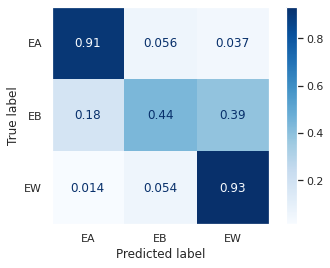

In [59]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay.from_estimator(RF_fit, test_1, test_2, cmap=plt.cm.Blues, display_labels=classes,normalize='true')
plt.grid(False)

Dado que el porcentaje de precisión de una de las opciones de clasificación no es suficientemente confiable, busco mejorar los hiperparámetros del modelo Random Forest para mejorar los resultados:

In [60]:
from sklearn.model_selection import RandomizedSearchCV

In [61]:
n_est= list(range(600, 900,50))
max_d=list(range(10, 20))
min_split= list(range(2, 12))
min_leaf=list(range(1,8))
weight_options = ['balanced', 'balanced_subsample']

In [62]:
#Expreso la distribución de hiperparámetros de la siguiente manera:
param_dist = dict(n_estimators=n_est, max_depth=max_d, min_samples_split=min_split, min_samples_leaf=min_leaf, class_weight=weight_options)

In [41]:
rand = RandomizedSearchCV(RF, param_dist, cv=10, scoring='accuracy', n_iter=10, random_state=234)
rand.fit(muestra_a, muestra_b.values.ravel())
pd.DataFrame(rand.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

KeyboardInterrupt: 

In [63]:
print(rand.best_score_)
print(rand.best_params_)

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_score_'

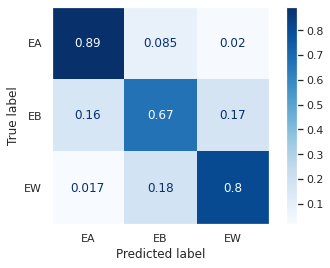

In [64]:
#n_estimators': 850, 'min_samples_split': 11, 'min_samples_leaf': 5, 'max_depth': 19, 'class_weight': 'balanced'
RF = RandomForestClassifier(n_estimators=800, max_depth=16, min_samples_split=10, min_samples_leaf=5, class_weight='balanced_subsample')
RF_fit = RF.fit(train_1, train_2.values.ravel())

disp = ConfusionMatrixDisplay.from_estimator(RF_fit, test_1, test_2, cmap=plt.cm.Blues, display_labels=classes, normalize='true')
plt.grid(False)

De la matriz de confusión se puede observar que los porcentajes de precisión de cada variable son 'EA'=89%, 'EB'=67% y 'EW'=80%. Si bien se perdió un poco de precisión en la clasificación de las variables 'EA' y 'EW', se ganó bastante precisión en la variable 'EB'. Es posible que empleando GridSearch para probar con todas las posibles combinaciones de hiperparámetros, en lugar de RandomizedSearch que hace algunas elecciones aleatorias de los mismos, se llegara a un mejor resultado que el obtenido. Sin embargo el tiempo necesario para la primer opción era excesivamente mayor, y a efectos prácticos consideré conveniente hacer una aproximación del mismo. Por lo tanto, una vez conforme con el modelo entrenado, procedo a aplicar el mismo a una muestra de 84530 datos que no poseen clasificación:

In [65]:
tabla2 = pd.read_csv('binaries.csv')
tabla2=pd.DataFrame(tabla2)

Considero las mismas variables que se usaron para la muestra de entrenamiento y testeo:

In [67]:
muestra4=tabla2[['raj2000', 'dej2000', 'l', 'b', 'mean_vmag', 'amplitude', 'period','phot_g_mean_mag',
                  'e_phot_g_mean_mag', 'phot_bp_mean_mag', 'e_phot_bp_mean_mag',
                   'phot_rp_mean_mag', 'e_phot_rp_mean_mag', 'bp_rp', 'parallax',
                   'parallax_error', 'vt', 'dist', 'j_mag', 'e_j_mag', 'h_mag', 'e_h_mag',
                   'k_mag', 'e_k_mag', 'w1_mag', 'e_w1_mag', 'w2_mag', 'e_w2_mag',
                   'w3_mag', 'w4_mag', 'w1_w2', 'w3_w4']]

In [68]:
muestra4= muestra4.dropna(subset=['raj2000', 'dej2000', 'l', 'b', 'mean_vmag', 'amplitude', 'period','phot_g_mean_mag',
                  'e_phot_g_mean_mag', 'phot_bp_mean_mag', 'e_phot_bp_mean_mag',
                   'phot_rp_mean_mag', 'e_phot_rp_mean_mag', 'bp_rp', 'parallax',
                   'parallax_error', 'vt', 'dist', 'j_mag', 'e_j_mag', 'h_mag', 'e_h_mag',
                   'k_mag', 'e_k_mag', 'w1_mag', 'e_w1_mag', 'w2_mag', 'e_w2_mag',
                   'w3_mag', 'w4_mag', 'w1_w2', 'w3_w4'])

In [69]:
muestra4.shape

(78881, 32)

Aplico el modelo Random Forests a la muestra nueva:

In [70]:
RF_pred = RF_fit.predict(muestra4)

In [71]:
RFpred=pd.DataFrame(RF_pred)

# Resultados

En esta sección se expondrán gráficamente los resultados obtenidos de la clasificación realizada en la nueva muestra y una comparación con la muestra de entrenamiento.

In [72]:
classes_names=le.inverse_transform(RF_pred)
muestra4['variable_type']=classes_names
muestra4['variable_type_num']=RF_pred

In [73]:
muestra4 = muestra4.sort_values('variable_type_num',ascending=False)

Elimino los valores atípicos de dos de las variables más representativas de la muestra: la amplitud y el período. Considero solo los valores que se encuentren entre los percentiles 10 y 90 en el caso de la amplitud, y entre 20 y 80 en el caso del período, respetando las mismas condiciones que se utilizaron con la muestra de entrenamiento:

Text(0.5, 1.0, 'Amplitude')

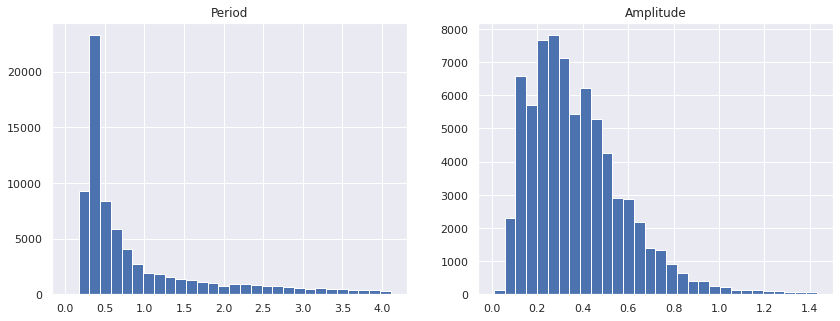

In [74]:
fig, axes = plt.subplots(1, 2, figsize=(14,5))


q1= np.quantile(muestra4['period'], 0.20)
q3= np.quantile(muestra4['period'], 0.80)
minn=q1-1.5*(q3-q1)
maxx=q3+1.5*(q3-q1)
muestra4=muestra4[(muestra4['period'] > minn)&(muestra4['period'] < maxx)]
axes[0].hist(muestra4['period'],bins=30)
axes[0].set_title('Period')

q11= np.quantile(muestra4['amplitude'], 0.10)
q33= np.quantile(muestra4['amplitude'], 0.90)
minn=q11-1.5*(q33-q11)
maxx=q33+1.5*(q33-q11)
muestra4=muestra4[(muestra4['amplitude'] > minn)&(muestra4['amplitude'] < maxx)]
axes[1].hist(muestra4['amplitude'],bins=30)
axes[1].set_title('Amplitude')


A continuación se muestran los histogramas de dichas variables. En la fila superior se puede ver la representación para la muestra de entrenamineto y en la fila inferior para la muestra clasificada en última instancia con Machine Learning utilizando el modelo de Random Forests entrenado. 

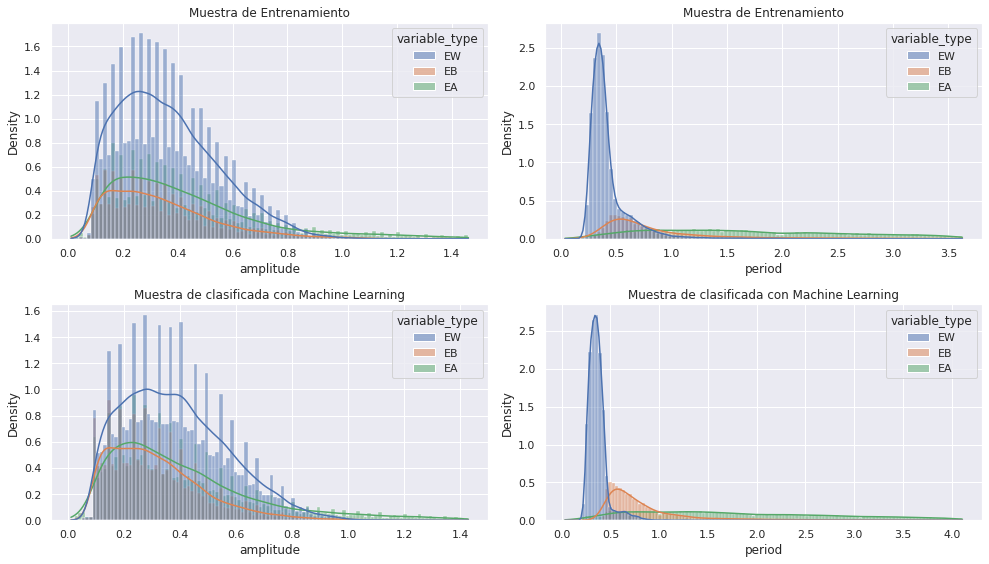

In [75]:
fig, axes = plt.subplots(2, 2, figsize=(14,8))

# Amplitud Muestra entrenamiento
sns.histplot(ax=axes[0,0],data=muestra, x="amplitude", hue="variable_type",kde=True,stat='density',common_norm=True)
axes[0, 0].set_title("Muestra de Entrenamiento")

# Período Muestra entrenamiento
sns.histplot(ax=axes[0,1],data=muestra, x="period", hue="variable_type",kde=True,stat='density',common_norm=True)
axes[0, 1].set_title("Muestra de Entrenamiento")


# Amplitud Muestra clasificada a partir de Machine Learning
sns.histplot(ax=axes[1,0],data=muestra4, x="amplitude", hue="variable_type",kde=True,stat='density',common_norm=True)
axes[1, 0].set_title("Muestra de clasificada con Machine Learning")

# Período Muestra clasificada a partir de Machine Learning
sns.histplot(ax=axes[1,1],data=muestra4, x="period", hue="variable_type",kde=True,stat='density',common_norm=True)
axes[1, 1].set_title("Muestra de clasificada con Machine Learning")

fig.tight_layout()

A simple vista se puede observar una buena coincidencia en la clasificación de las variables 'EW' y 'EA', siendo menor la precisión de las binarias 'EB', tal y como predijo el modelo anteriormente. A continuación realizaré una comparación de cada variable clasificada por separado.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


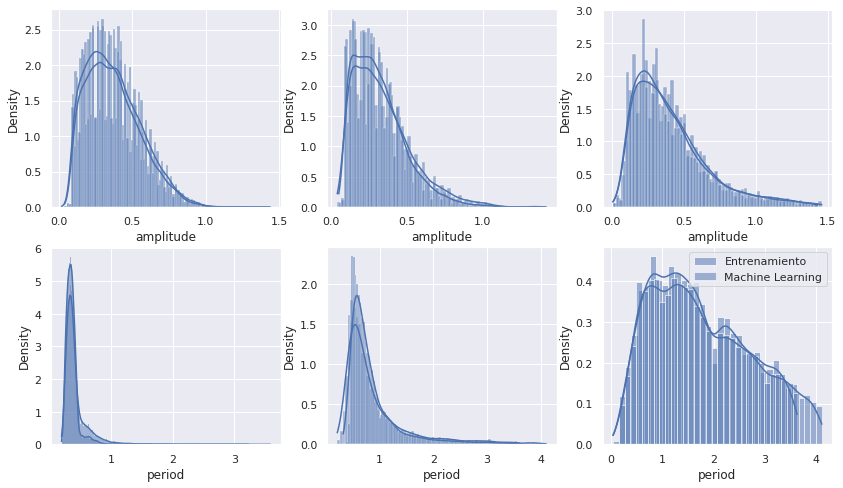

In [81]:
fig, axes = plt.subplots(2, 3, figsize=(14,8))

a_ew = muestra[(muestra.variable_type=='EW')]['amplitude']
aa_ew = muestra4[(muestra4.variable_type=='EW')]['amplitude']
a_eb = muestra[(muestra.variable_type=='EB')]['amplitude']
aa_eb = muestra4[(muestra4.variable_type=='EB')]['amplitude']
a_ea = muestra[(muestra.variable_type=='EA')]['amplitude']
aa_ea = muestra4[(muestra4.variable_type=='EA')]['amplitude']

p_ew = muestra[(muestra.variable_type=='EW')]['period']
pp_ew = muestra4[(muestra4.variable_type=='EW')]['period']
p_eb = muestra[(muestra.variable_type=='EB')]['period']
pp_eb = muestra4[(muestra4.variable_type=='EB')]['period']
p_ea = muestra[(muestra.variable_type=='EA')]['period']
pp_ea = muestra4[(muestra4.variable_type=='EA')]['period']


#plt.hist(aa_ew, bins=30,label=['Machine Learning'])
#plt.hist(a_ew, bins=30,label=['Entrenamiento'])


sns.histplot(ax=axes[0,0],data=a_ew,kde=True,stat='density',common_norm=True,label='Entrenamiento')
sns.histplot(ax=axes[0,0],data=aa_ew,kde=True,stat='density',common_norm=True,label='Machine Learning')
plt.legend(loc='upper right')
sns.histplot(ax=axes[0,1],data=a_eb,kde=True,stat='density',common_norm=True,label='Entrenamiento')
sns.histplot(ax=axes[0,1],data=aa_eb,kde=True,stat='density',common_norm=True,label='Machine Learning')
plt.legend(loc='upper right')
sns.histplot(ax=axes[0,2],data=a_ea,kde=True,stat='density',common_norm=True,label='Entrenamiento')
sns.histplot(ax=axes[0,2],data=aa_ea,kde=True,stat='density',common_norm=True,label='Machine Learning')
plt.legend(loc='upper right')
sns.histplot(ax=axes[1,0],data=p_ew,kde=True,stat='density',common_norm=True,label='Entrenamiento')
sns.histplot(ax=axes[1,0],data=pp_ew,kde=True,stat='density',common_norm=True,label='Machine Learning')
plt.legend(loc='upper right')
sns.histplot(ax=axes[1,1],data=p_eb,kde=True,stat='density',common_norm=True,label='Entrenamiento')
sns.histplot(ax=axes[1,1],data=pp_eb,kde=True,stat='density',common_norm=True,label='Machine Learning')
plt.legend(loc='upper right')
sns.histplot(ax=axes[1,2],data=p_ea,kde=True,stat='density',common_norm=True,label='Entrenamiento')
sns.histplot(ax=axes[1,2],data=pp_ea,kde=True,stat='density',common_norm=True,label='Machine Learning')
plt.legend(loc='upper right')

